<a href="https://colab.research.google.com/github/abakm/AL-ML_Assignment-1/blob/master/Case_Study_02_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [151]:
# Load dataset
df = pd.read_csv('./Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [152]:
# checking for null values
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [153]:
# Delete duplicates
df.drop_duplicates(inplace=True)

In [154]:
# checking for types
df.dtypes

,0
Channel,int64
Region,int64
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


In [155]:
pca_df = df

In [156]:
# Feature columns
features  = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [157]:
# Data preprocessing - Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
df = pd.DataFrame(X_scaled, columns=features)

Channel, Region are  appears to be a categorical variables as K-Means relies on distance calculations. If Channel is numerical just representing an ID, it's not a characteristic for clustering.

In [158]:
# set feature
x = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Clustering

### using Kmeans

In [159]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
  km = KMeans(n_clusters=i, n_init=10)
  km.fit(x)
  wcss.append(km.inertia_)

wcss

[2639.9999999999977,
 1955.1486912956739,
 1619.952782172456,
 1322.5122129012448,
 1058.77125325701,
 918.4163094024065,
 832.0060556014407,
 744.2113430456328,
 659.1982867640944,
 617.9111656230622]

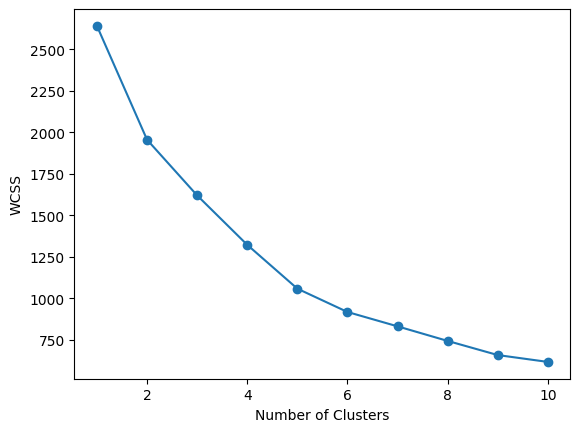

In [160]:
# plot number of cluters agaist WCSS
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

#### Elbow Method Analysis: The plot shows a clear "elbow" or bend at k=3, where the rate of decrease in WCSS (Within-Cluster Sum of Squares) significantly slows down.

In [161]:
# Create and fit the model

km = KMeans(n_clusters=3, n_init=10)
km.fit(x)

KMeans(n_clusters=3, n_init=10)

In [162]:
# Predict the model
cluster_labels = km.predict(x)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [163]:
# items in each clusters
pd.Series(cluster_labels).value_counts()

,count
0,393
1,44
2,3


In [164]:
# Assign cluster labels to dataset
df['kmeans_cluster'] = cluster_labels
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmeans_cluster
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0
...,...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,0
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,0
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,1
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,0


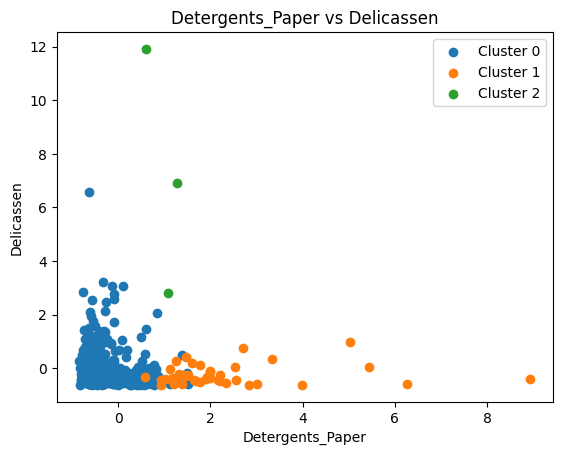

In [165]:
for i in range(max(cluster_labels)+1):
  cluster_data = x[df['kmeans_cluster'] == i]
  plt.scatter(cluster_data['Grocery'], cluster_data['Frozen'], label=f"Cluster {i}")


plt.legend()
plt.xlabel('Detergents_Paper')
plt.ylabel('Delicassen')
plt.title("Detergents_Paper vs Delicassen")
plt.show()


In [166]:
# predict the model
cluster = km.predict([[12669,	9656,	7561,	214,	2674,	1338]])
print(cluster[0])

2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


### using Agglomerative Hierarchical Clustering

In [167]:
# using linkage
merge = linkage(x, method='ward')

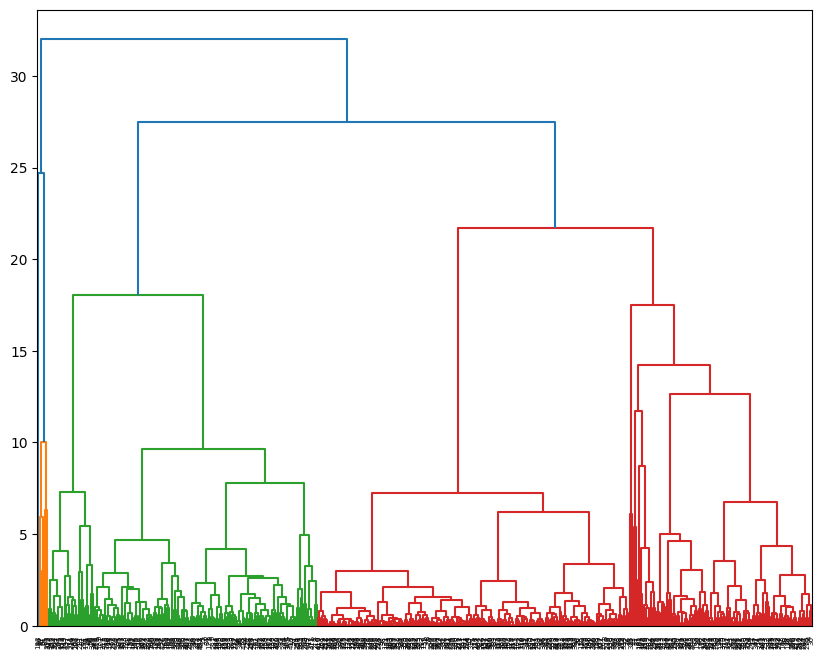

In [168]:
# ploting dendrogram

plt.figure(figsize=(10, 8))
dendrogram(merge)
plt.show()

In [169]:
cluster = fcluster(merge, 25, criterion='distance')

In [170]:
cluster

array([2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3,
       3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2,
       2, 2, 2, 1, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 1, 2, 2, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 1, 1, 3,
       3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2,
       3, 3, 2, 3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3,

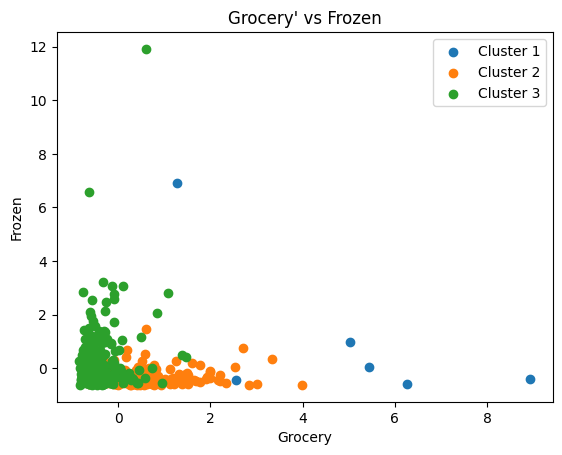

In [171]:
for i in range(1, max(cluster)+1):
  cluster_data = x[cluster==i]
  plt.scatter(cluster_data['Grocery'], cluster_data['Frozen'],label=f"Cluster {i}")



plt.legend()
plt.xlabel('Grocery')
plt.ylabel("Frozen")
plt.title("Grocery' vs Frozen")
plt.show()

# Principal Component Analysis (PCA)

In [172]:
# select features and target
x = pd.DataFrame(scale(pca_df), index= pca_df.index, columns= pca_df.columns)
x

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [173]:
# create PCA model

pca = PCA()
X_new = pca.fit_transform(x)
X_new

array([[ 0.84393893, -0.51535075,  0.76763222, ...,  0.93944129,
         0.65476177,  0.01810169],
       [ 1.06267645, -0.48460126,  0.67297526, ...,  0.86722684,
         0.51102248,  0.0778948 ],
       [ 1.26914052,  0.68205455,  0.6640946 , ...,  1.07844165,
        -0.20315184, -0.2540374 ],
       ...,
       [ 3.86514909, -0.47985376,  0.52534452, ..., -0.28032041,
        -0.57529675, -0.08900336],
       [-1.09706738, -0.06989568,  0.63012755, ..., -0.33517   ,
        -0.15374358, -0.03730795],
       [-1.16595067, -0.90215675,  0.59770486, ..., -0.50872064,
         0.02436002,  0.01866823]])

In [175]:
pca_df = pd.DataFrame(X_new, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.843939,-0.515351,0.767632,0.044215,-0.446234,0.939441,0.654762,0.018102
1,1.062676,-0.484601,0.672975,-0.401372,-0.130458,0.867227,0.511022,0.077895
2,1.269141,0.682055,0.664095,-1.634953,-1.193813,1.078442,-0.203152,-0.254037
3,-1.056782,0.610821,0.505654,-0.196005,0.457855,-0.116959,-0.313804,0.054377
4,0.634030,0.974199,0.771209,-0.186374,-0.813877,1.505372,-0.160399,0.003763
...,...,...,...,...,...,...,...,...
435,0.222884,2.480505,0.360936,0.601036,1.109212,-0.364851,0.346184,0.860980
436,-1.290172,1.560397,0.756171,1.342401,-0.533462,0.205789,-0.242280,-0.226984
437,3.865149,-0.479854,0.525345,0.687132,0.108968,-0.280320,-0.575297,-0.089003
438,-1.097067,-0.069896,0.630128,-0.311821,-0.424792,-0.335170,-0.153744,-0.037308


In [176]:
pca.explained_variance_ratio_

array([0.38750123, 0.22374588, 0.12647173, 0.09229904, 0.06957905,
       0.05741354, 0.03514076, 0.00784877])